In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generación de datos
np.random.seed(0) # Semilla para reproducibilidad
n_samples = 200 # N° de datos para la serie de tiempo
t = np.arange(n_samples) # Valores de tiempo

# Creación de serie de tiempo sintética (creciente)
time_series = 0.1 * t + np.random.randn(n_samples)

In [3]:
train_size = int(n_samples * 0.8) # 80% para entrenamiento
train_data = time_series[:train_size]
test_data = time_series[train_size:]

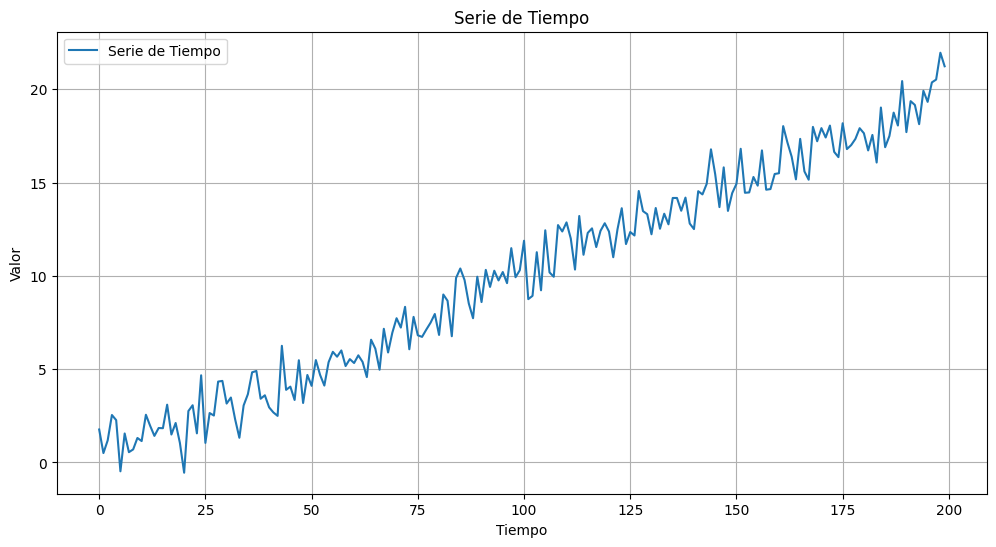

In [4]:
# Gráfico de la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(t, time_series, label='Serie de Tiempo')
plt.title('Serie de Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Transformación de datos a secuencias
def create_dataset(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# N° de pasos de tiempo para la serie temporal
seq_length = 16

# Crear conjuntos de entrenamiento y prueba en formato 3D
X_train, y_train = create_dataset(train_data, seq_length)
X_test, y_test = create_dataset(test_data, seq_length)

In [15]:
y_train

array([ 3.09407907,  1.49484174,  2.1130677 ,  1.04590426, -0.55298982,
        2.7536186 ,  3.0644362 ,  1.55783498,  4.66975462,  1.04563433,
        2.64575852,  2.51281615,  4.33277921,  4.36935877,  3.15494743,
        3.47816252,  2.31221425,  1.31920353,  3.05208785,  3.65634897,
        4.83029068,  4.90237985,  3.41267318,  3.59769725,  2.95144703,
        2.67998206,  2.49372981,  6.2507754 ,  3.89034782,  4.0619257 ,
        3.34720464,  5.47749036,  3.18610215,  4.68725972,  4.10453344,
        5.4869025 ,  4.68919486,  4.11936782,  5.37181777,  5.92833187,
        5.66651722,  6.0024719 ,  5.16567791,  5.53725883,  5.32753955,
        5.74044684,  5.38685372,  4.5737174 ,  6.57742614,  6.09821906,
        4.96980165,  7.16278226,  5.89270164,  6.9519454 ,  7.72909056,
        7.22898291,  8.33940068,  6.06517418,  7.80234164,  6.81518991,
        6.72920285,  7.12115034,  7.48844747,  7.95616534,  6.83485016,
        9.00082649,  8.66566244,  6.76375631,  9.88825219, 10.39

In [6]:
# Modelo LSTM
model = Sequential()
model.add(LSTM(32,
               activation='relu',
               input_shape=(seq_length, 1),
               return_sequences = True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam', loss='mse')

In [8]:
# Entrenamiento
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 118.6389
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 83.3197
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 59.3408
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 25.6626
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 14.3011
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.1041
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.4173
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.2504
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.9477
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.4440
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.3826
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.2233
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1.0202
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.0827
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0459
Epoch 16/100


In [9]:
# Evaluación
Evaluacion = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {Evaluacion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - loss: 1.9258
Pérdida en el conjunto de prueba: 1.9258390665054321


In [10]:
print("y_test \n", y_test)
# Predicción
y_pred = model.predict(X_test)
print("y_pred \n", y_pred)

y_test 
 [16.79659034 17.01045022 17.3444675  17.91747916 17.64600609 16.72504871
 17.5563816  16.07659685 19.02523145 16.89794234 17.49561666 18.75216508
 18.060437   20.4430146  17.70714309 19.36705087 19.16071718 18.1319065
 19.92327666 19.32845367 20.37179055 20.52350415 21.96323595 21.23652795]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
y_pred 
 [[17.288322]
 [17.376278]
 [17.41161 ]
 [17.404055]
 [17.4289  ]
 [17.565918]
 [17.58849 ]
 [17.667843]
 [17.770239]
 [17.784876]
 [17.75369 ]
 [17.773058]
 [17.750525]
 [17.741114]
 [17.835655]
 [17.90198 ]
 [17.97277 ]
 [18.079954]
 [18.229126]
 [18.379314]
 [18.429077]
 [18.52748 ]
 [18.692389]
 [18.848785]]


<function matplotlib.pyplot.show(close=None, block=None)>

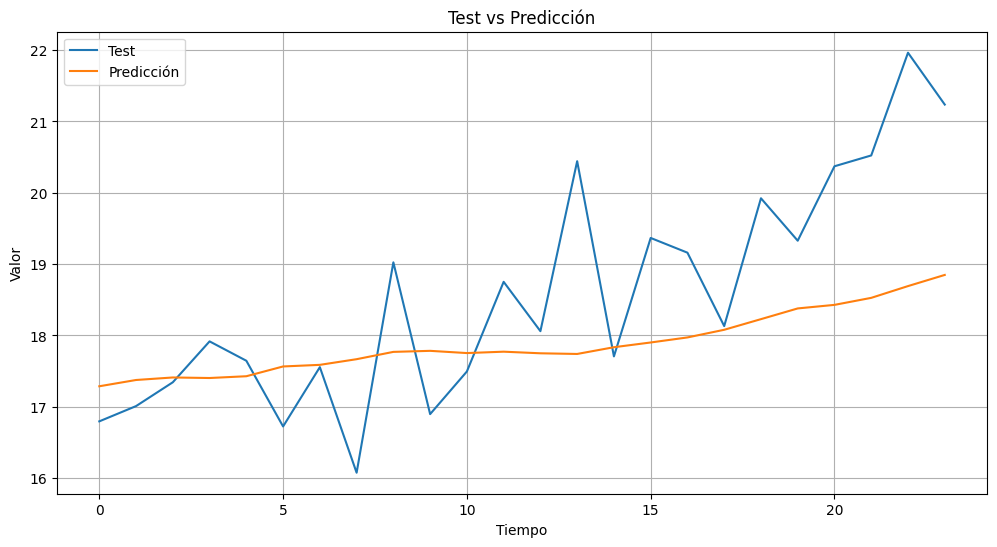

In [11]:
# Gráfico del test vs pronóstico de la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Test')
plt.plot(y_pred, label='Predicción')
plt.title('Test vs Predicción')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show